In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas_datareader 
import datetime

In [4]:
import pandas_datareader.data as web

In [5]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2018, 1, 1)
tesla = web.DataReader("TSLA",'quandl', start, end)

In [6]:
tesla.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-12-29,316.18,316.4100,310.00,311.35,3727621.0,0.0,1.0,316.18,316.4100,310.00,311.35,3727621.0
2017-12-28,311.75,315.8200,309.54,315.36,4294689.0,0.0,1.0,311.75,315.8200,309.54,315.36,4294689.0
2017-12-27,316.00,317.6800,310.75,311.64,4645441.0,0.0,1.0,316.00,317.6800,310.75,311.64,4645441.0
2017-12-26,323.83,323.9400,316.58,317.29,4321909.0,0.0,1.0,323.83,323.9400,316.58,317.29,4321909.0
2017-12-22,329.51,330.9214,324.82,325.20,4186131.0,0.0,1.0,329.51,330.9214,324.82,325.20,4186131.0


In [7]:
tesla.to_csv('Tesla_Stock.csv')

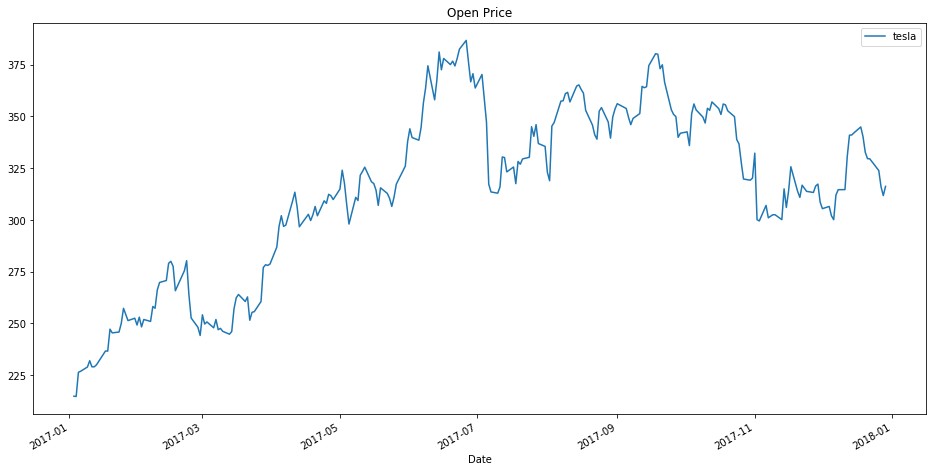

In [10]:
tesla['Open'].plot(label='tesla',figsize=(16,8),title='Open Price')
plt.legend()

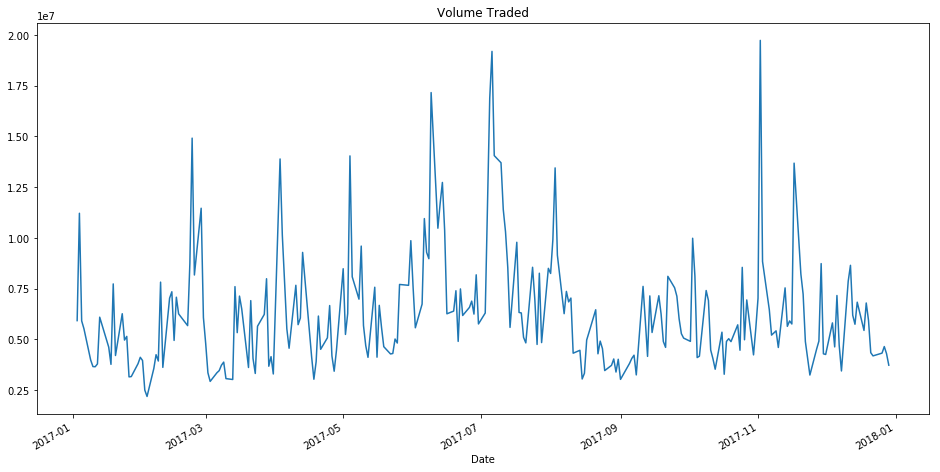

In [11]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')

In [12]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']

Text(0,0.5,'Total Traded')

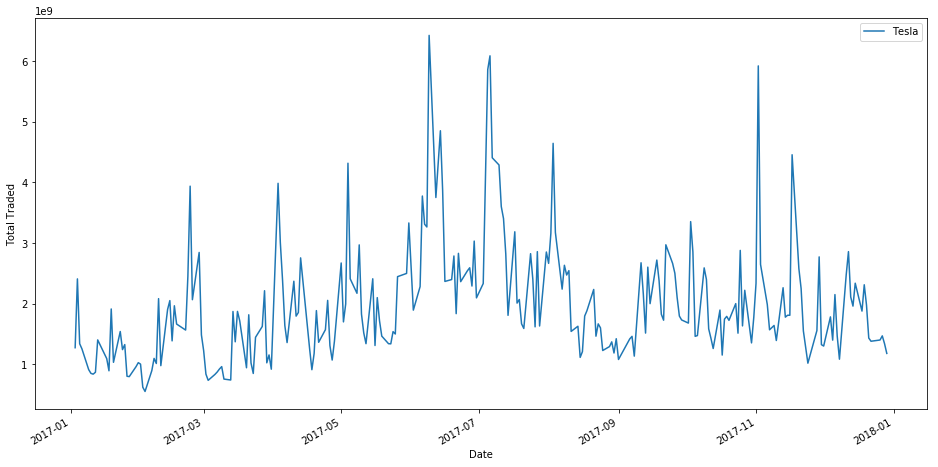

In [13]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
plt.legend()
plt.ylabel('Total Traded')

In [14]:
from pandas.plotting import scatter_matrix

In [16]:
car_comp = pd.concat([tesla['Open']],axis=1)

In [17]:
car_comp.columns = ['Tesla Open']

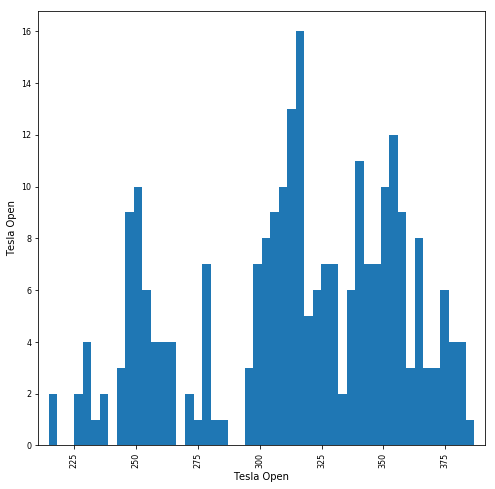

In [18]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [19]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [20]:
tesla.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,Total Traded,returns
Date,,,,,,,,,,,,,,
2017-12-29,316.18,316.4100,310.00,311.35,3727621.0,0.0,1.0,316.18,316.4100,310.00,311.35,3727621.0,1.178599e+09,NaN
2017-12-28,311.75,315.8200,309.54,315.36,4294689.0,0.0,1.0,311.75,315.8200,309.54,315.36,4294689.0,1.338869e+09,0.012879
2017-12-27,316.00,317.6800,310.75,311.64,4645441.0,0.0,1.0,316.00,317.6800,310.75,311.64,4645441.0,1.467959e+09,-0.011796
2017-12-26,323.83,323.9400,316.58,317.29,4321909.0,0.0,1.0,323.83,323.9400,316.58,317.29,4321909.0,1.399564e+09,0.018130
2017-12-22,329.51,330.9214,324.82,325.20,4186131.0,0.0,1.0,329.51,330.9214,324.82,325.20,4186131.0,1.379372e+09,0.024930


In [21]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [22]:
tesla.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,Total Traded,returns
Date,,,,,,,,,,,,,,
2017-12-29,316.18,316.4100,310.00,311.35,3727621.0,0.0,1.0,316.18,316.4100,310.00,311.35,3727621.0,1.178599e+09,NaN
2017-12-28,311.75,315.8200,309.54,315.36,4294689.0,0.0,1.0,311.75,315.8200,309.54,315.36,4294689.0,1.338869e+09,0.012879
2017-12-27,316.00,317.6800,310.75,311.64,4645441.0,0.0,1.0,316.00,317.6800,310.75,311.64,4645441.0,1.467959e+09,-0.011796
2017-12-26,323.83,323.9400,316.58,317.29,4321909.0,0.0,1.0,323.83,323.9400,316.58,317.29,4321909.0,1.399564e+09,0.018130
2017-12-22,329.51,330.9214,324.82,325.20,4186131.0,0.0,1.0,329.51,330.9214,324.82,325.20,4186131.0,1.379372e+09,0.024930


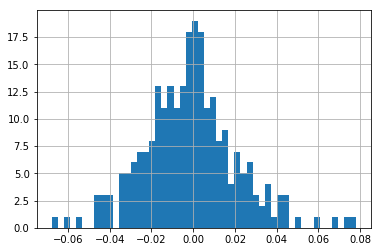

In [23]:
tesla['returns'].hist(bins=50)

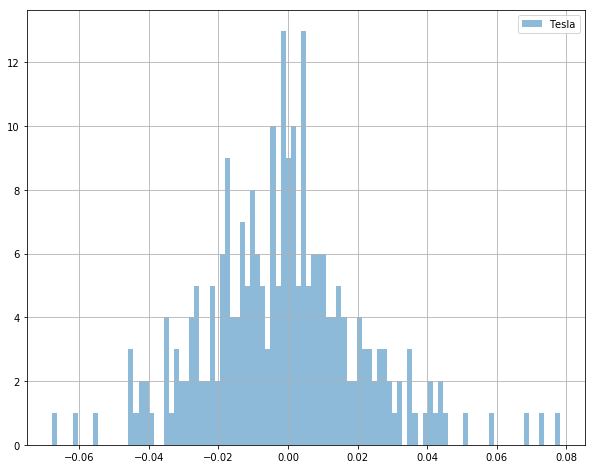

In [24]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
plt.legend()

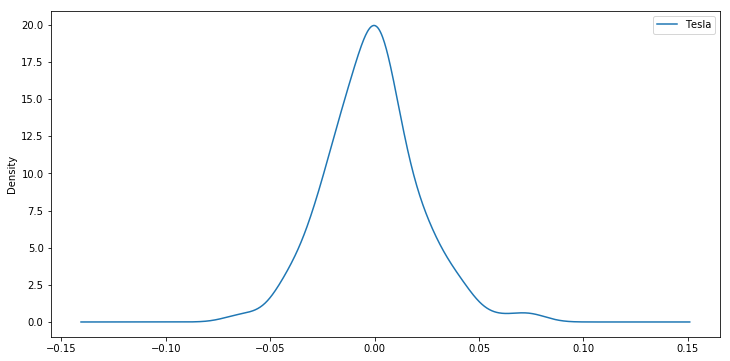

In [25]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
plt.legend()

In [26]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [27]:
tesla.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,Total Traded,returns,Cumulative Return
Date,,,,,,,,,,,,,,,
2017-12-29,316.18,316.4100,310.00,311.35,3727621.0,0.0,1.0,316.18,316.4100,310.00,311.35,3727621.0,1.178599e+09,NaN,NaN
2017-12-28,311.75,315.8200,309.54,315.36,4294689.0,0.0,1.0,311.75,315.8200,309.54,315.36,4294689.0,1.338869e+09,0.012879,1.012879
2017-12-27,316.00,317.6800,310.75,311.64,4645441.0,0.0,1.0,316.00,317.6800,310.75,311.64,4645441.0,1.467959e+09,-0.011796,1.000931
2017-12-26,323.83,323.9400,316.58,317.29,4321909.0,0.0,1.0,323.83,323.9400,316.58,317.29,4321909.0,1.399564e+09,0.018130,1.019078
2017-12-22,329.51,330.9214,324.82,325.20,4186131.0,0.0,1.0,329.51,330.9214,324.82,325.20,4186131.0,1.379372e+09,0.024930,1.044484


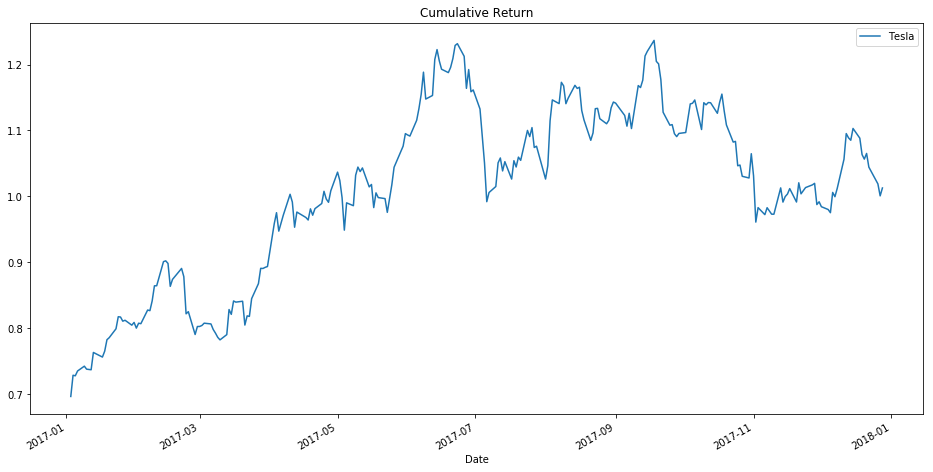

In [28]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
plt.legend()